In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
fg_df=pd.read_csv('csv_files/fear_greed_index.csv')
h_df=pd.read_csv('csv_files/historical_data.csv')

In [4]:
fg_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<Axes: xlabel='classification'>

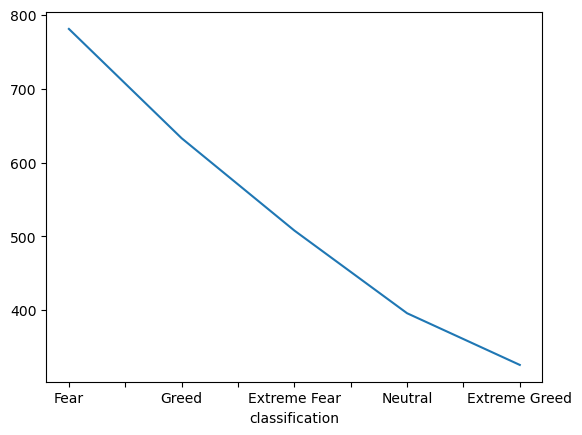

In [5]:
fg_df['classification'].value_counts().plot()

In [6]:
h_df.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
160381,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,25.220,0.71,17.91,SELL,19-12-2024 11:13,25345.3241,Sell,0.098876,0x00000000000000000000000000000000000000000000...,56529334243,False,0.000895,2.300000e+14,1.730000e+12
68720,0xbaaaf6571ab7d571043ff1e313a9609a10637864,HYPE,19.357,2.00,38.71,BUY,25-02-2025 07:24,241191.4300,Open Long,0.000000,0x4a9f3cadf500725fd87e041e692b5802028f00d7c86b...,74607648912,False,0.001857,7.010000e+13,1.740000e+12
62009,0x6d6a4b953f202f8df5bed40692e7fd865318264a,TRUMP,13.071,75.00,980.32,SELL,24-04-2025 00:40,0.0000,Open Short,0.000000,0xe1445936265b4198dad404221d171101ac00c58cc72c...,88400774910,True,0.329388,6.900000e+14,1.750000e+12
94240,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,HYPE,26.300,3.19,83.90,SELL,16-02-2025 22:14,-83.8200,Open Short,0.000000,0x00000000000000000000000000000000000000000000...,72710788464,False,0.004194,1.060000e+15,1.740000e+12
197902,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,HYPE,15.220,253.93,3864.81,SELL,20-03-2025 00:44,19826.3100,Close Long,48.830739,0x92c241bf6e77ee830cea041fe0199901940057f2f3c7...,80800628974,False,0.386481,1.630000e+14,1.740000e+12


Assignment Overview

You will have to work with two primary datasets:
 
Your objective is to explore the relationship between trader performance and market 
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading 
strategies.


In [7]:
h_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
h_df.info(),fg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

(None, None)

In [9]:
h_df['Timestamp IST'] = pd.to_datetime(h_df['Timestamp IST'], dayfirst=True)

In [10]:
fg_df['date']= pd.to_datetime(fg_df['date'])


In [11]:
h_df['trade_date']=h_df['Timestamp IST'].dt.date
h_df['trade_date']= pd.to_datetime(h_df['trade_date'])

In [12]:
h_df.shape,fg_df.shape

((211224, 17), (2644, 4))

In [13]:
fg_df['date'].nunique(),h_df['trade_date'].nunique()

(2644, 480)

In [14]:
# merging both table
merge_df = pd.merge(
    h_df,
    fg_df[['date','classification']],
    left_on = 'trade_date',
    right_on = 'date',
    how='left'
)

In [15]:
merge_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed


In [16]:
merge_df['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [17]:
 merge_df[merge_df['classification'].isna() == True]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
727,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.8330,10000.00,28330.00,BUY,2024-10-26 04:44:00,-32797.51,Close Short,11655.000000,0x4da9426d2bf6ec027d8404152f9bad02010700c745eb...,40671411386,False,2.719680,8.350000e+13,1.730000e+12,2024-10-26,NaT,NaN
728,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.7110,10797.51,29272.05,BUY,2024-10-26 04:52:00,-22797.51,Close Short,13901.794130,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671438761,False,2.810115,3.230000e+14,1.730000e+12,2024-10-26,NaT,NaN
729,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,6908.33,17884.98,BUY,2024-10-26 04:52:00,-12000.00,Close Short,9737.981968,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,1.716957,1.070000e+15,1.730000e+12,2024-10-26,NaT,NaN
730,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,529.39,1370.54,BUY,2024-10-26 04:52:00,-5091.67,Close Short,746.228144,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.131570,8.770000e+14,1.730000e+12,2024-10-26,NaT,NaN
731,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,38.65,100.06,BUY,2024-10-26 04:52:00,-4562.28,Close Short,54.481040,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.009605,9.820000e+14,1.730000e+12,2024-10-26,NaT,NaN
732,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,4523.63,11711.23,BUY,2024-10-26 04:53:00,-4523.63,Close Short,6376.508848,0x39ce7efcc1773fd0eec704152fbcb4010100c8beadd4...,40671466136,False,1.124277,9.360000e+14,1.730000e+12,2024-10-26,NaT,NaN


In [18]:
merge_df.dropna(inplace=True) # dropped nan value 

In [20]:
merge_df.groupby('classification')[['Closed PnL','Fee','Size USD','Execution Price']].mean()

,Closed PnL,Fee,Size USD,Execution Price
classification,,,,
Extreme Fear,34.537862,1.116291,5349.731843,7054.795108
Extreme Greed,67.892861,0.675902,3112.251565,6082.195865
Fear,54.290400,1.495172,7816.109931,14152.620222
Greed,42.743559,1.254372,5736.884375,13411.276344
Neutral,34.307718,1.044798,4782.732661,12393.692779


<Axes: xlabel='classification'>

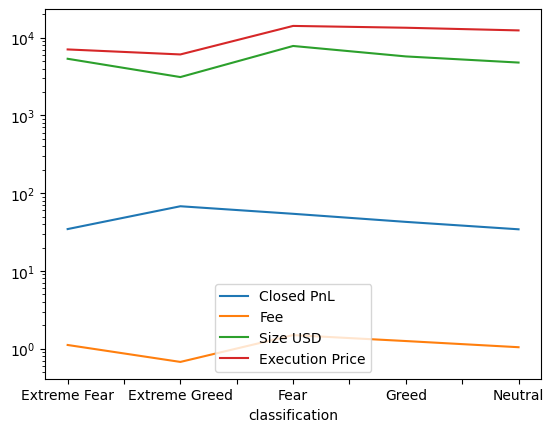

In [21]:
merge_df.groupby('classification')[['Closed PnL','Fee','Size USD','Execution Price']].mean().plot(logy=True)

Extreme Greed = High Profit, Low Cost, Low Volume → Traders may be more precise or cautious, taking smaller but more profitable trades.

Fear = High Volume, High Fee, High Price → Possibly panic-driven trading with larger positions and higher costs.

Extreme Fear = Lowest Profit → Riskier trades with lower returns, possibly due to uncertainty or volatility.

Neutral sentiment = Lowest engagement → Traders may be less active or less confident, leading to smaller trades and lower PnL.

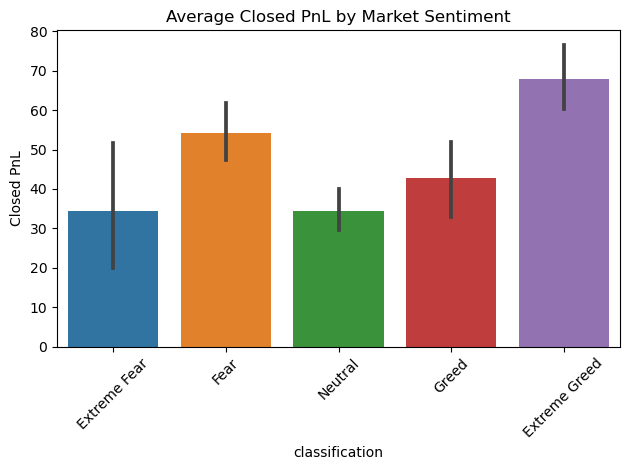

<Figure size 640x480 with 0 Axes>

In [22]:
sns.barplot(data=merge_df, x='classification', y='Closed PnL',
            estimator='mean', 
            order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'
])
plt.title('Average Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/pnl_vs_sentiment.png', bbox_inches='tight')
plt.show()

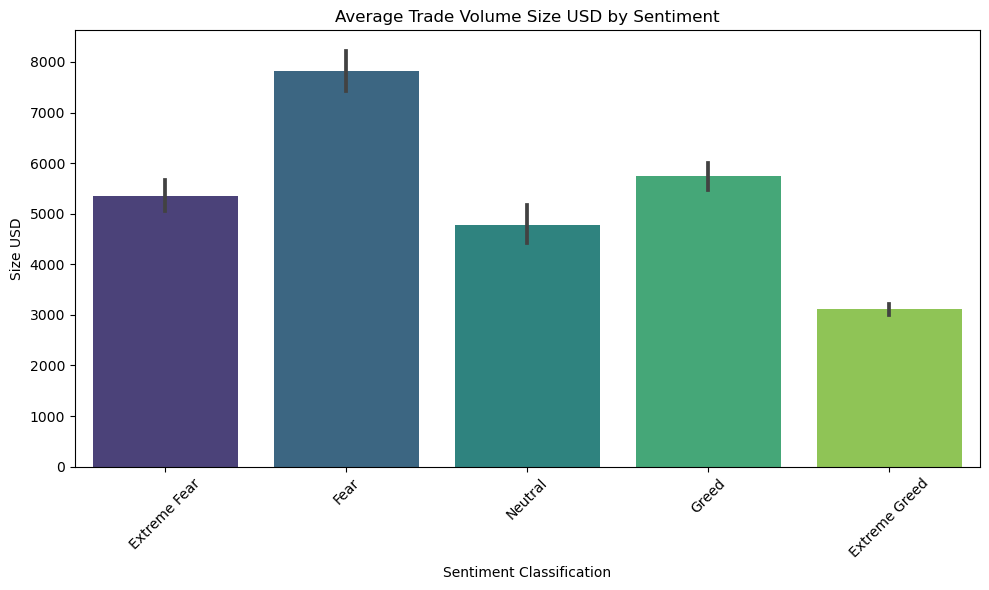

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(merge_df,
            x='classification',
            y='Size USD',
            estimator='mean',
            order=['Extreme Fear', 'Fear','Neutral','Greed','Extreme Greed'],
            palette='viridis'
           )
plt.title('Average Trade Volume Size USD by Sentiment')
plt.ylabel('Size USD')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/Volume_vs_sentiment.png', bbox_inches='tight')
plt.show()

Fear-> Highest-Traders may be reacting emotionally—taking larger positions, possibly driven by panic or opportunity.

Greed-> Second Highest-Confident but not reckless—traders are active, but more measured than during Fear.

Extreme Fear-> Moderate-Uncertainty may cause hesitation—some traders pull back, others dive in cautiously.

Neutral->  Lower-Market indecision—less conviction, fewer big moves.

Extreme Greed->  Lowest-Surprisingly conservative—traders may be locking in profits or avoiding overexposure.

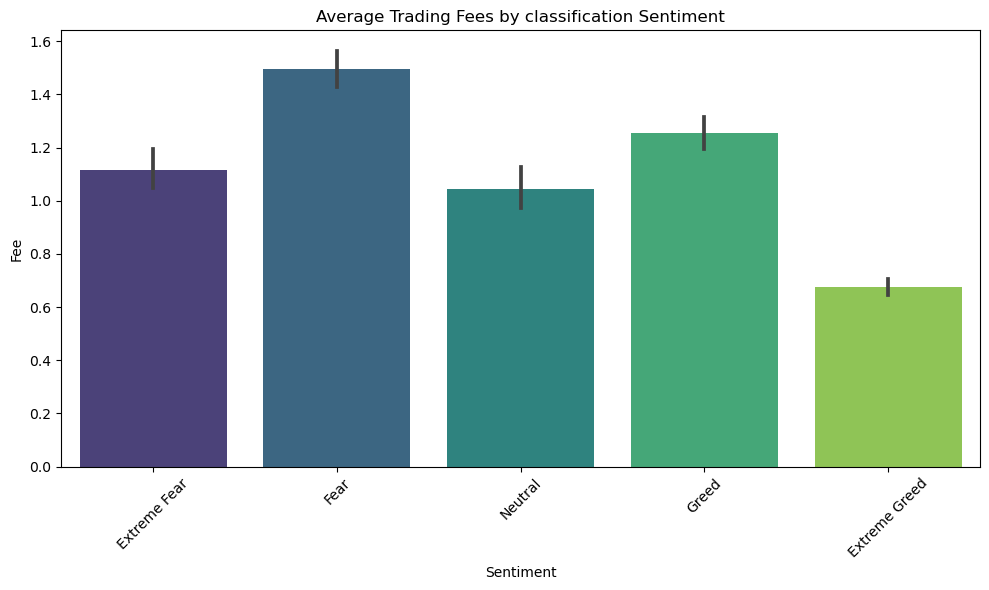

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(merge_df,
            x= 'classification',
            y='Fee',
            estimator='mean',
            order=['Extreme Fear', 'Fear','Neutral','Greed','Extreme Greed'],
            palette='viridis'
           )
plt.title('Average Trading Fees by classification Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Fee')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/Fee_vs_sentiment.png', bbox_inches='tight')
plt.show()



Fear-> Highest-Traders may be taking larger or more frequent trades, incurring higher costs—possibly driven by urgency or volatility.

Greed->High-Active trading, but slightly more controlled than Fear.

Extreme Fear->Moderate-Some hesitation—traders may be cautious, leading to fewer or smaller trades.

Neutral->Low-Less engagement, lower costs.

Extreme Greed->Lowest-Strategic trading—fewer, more precise trades with minimal fees.

###### Fear drives volume and cost, but not necessarily the highest profit.

######  Extreme Greed is the most efficient—low volume, low fee, high profit.

######  Neutral sentiment leads to minimal activity, which aligns with lower fees and volume.

######  This contrast between cost and outcome is powerful. It shows that trading more doesn’t mean trading better—and that sentiment can influence not just how much traders spend, but how wisely they spend.

In [25]:
merge_df.groupby('classification')['Side'].value_counts(normalize=True).unstack()


Side,BUY,SELL
classification,,
Extreme Fear,0.510981,0.489019
Extreme Greed,0.448590,0.551410
Fear,0.489513,0.510487
Greed,0.488559,0.511441
Neutral,0.503343,0.496657


-->Extreme Fear 51.1% buy	48.9% sell	Slightly more buying—traders may be betting on a rebound or bottoming out.

-->Extreme Greed 44.9%buy  55.1%sell	More selling—traders might be locking in profits or anticipating a reversal.

-->Fear	48.9%buy	51.0%sell	Slight tilt toward selling—uncertainty may drive cautious exits.

-->Greed	48.8%buy	51.1%sell	Similar to Fear—traders may be riding momentum but still taking profits.

-->Neutral 50.3%buy	49.7%sell	Balanced behavior—no strong bias, reflecting indecision.

Extreme Fear triggers contrarian optimism—more traders are buying, possibly expecting a bounce.

Extreme Greed triggers caution—more selling, likely profit-taking before a potential correction.

Fear and Greed show similar sell bias, but not extreme—traders may be hedging or rotating positions.

Neutral sentiment leads to balanced behavior, which aligns with low volume and low engagement.

This behavioral nuance is powerful. It shows that sentiment doesn’t just affect how much traders trade—it affects how they position themselves.

In [26]:
numeric_cols = ['Closed PnL', 'Fee', 'Size USD', 'Execution Price']
corr_matrix = merge_df[numeric_cols].corr()


In [27]:
corr_matrix

,Closed PnL,Fee,Size USD,Execution Price
Closed PnL,1.000000,0.084094,0.123645,-0.006429
Fee,0.084094,1.000000,0.745940,0.225266
Size USD,0.123645,0.745940,1.000000,0.189859
Execution Price,-0.006429,0.225266,0.189859,1.000000


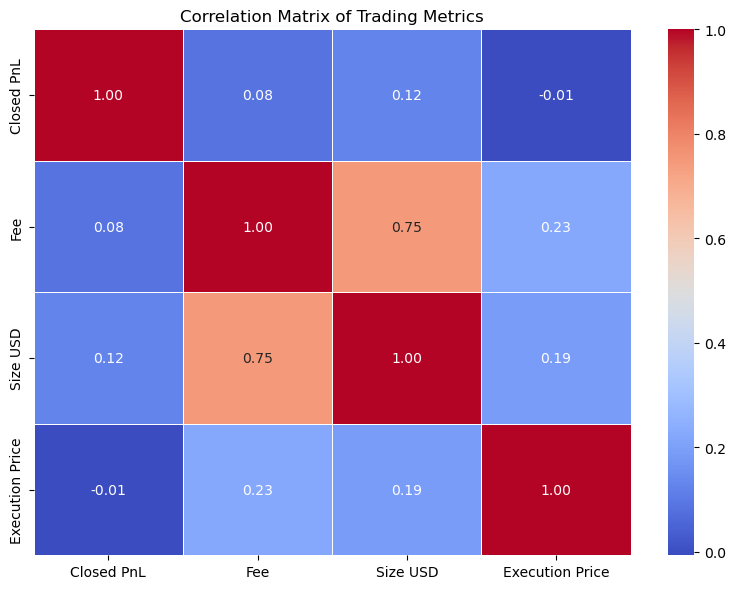

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Trading Metrics')
plt.tight_layout()
plt.savefig('outputs/correlation_matrix.png', bbox_inches='tight')
plt.show()